In [26]:
import cv2
import numpy as np
import keras
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from random import shuffle
from sklearn.model_selection import train_test_split
from random import shuffle
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [27]:
imageSize = 64
test_data_dir = "C:/Users/sppol/Documents/Ai_deeplearning/Pre/test"

In [28]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(imageSize, imageSize),#64
    batch_size=24,
    color_mode="grayscale",
    shuffle=False,
#     class_mode='categorical',
    classes=['Normal','Diseases']
   
    ) # set as test data


Found 459 images belonging to 2 classes.


In [29]:
from keras.models import load_model
teeth = load_model('Preprocessing3.h5')

In [30]:
test = teeth.predict_generator(test_generator, steps =20, verbose=0)
test = np.argmax(test, axis=1)

# print(test);
# print((test_generator.classes));
# print(len(test))
# print(len(test_generator.classes))

In [31]:
from sklearn.metrics import classification_report
target_names = ['Normal', 'Diseases']
print(classification_report(test_generator.classes, test, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.92      0.99      0.95       233
    Diseases       0.99      0.91      0.94       226

    accuracy                           0.95       459
   macro avg       0.95      0.95      0.95       459
weighted avg       0.95      0.95      0.95       459



In [32]:
import pandas as pd
from sklearn.metrics import confusion_matrix , roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
test_generator.reset

df = pd.DataFrame({
    'filename':test_generator.filenames,
    'predict':test[:],
    'classes':test_generator.classes
    
})

In [33]:
df

filename  predict  classes
0      Normal\Thidar  หญิง  23_1.bmp        0        0
1      Normal\Thidar  หญิง  23_2.bmp        0        0
2      Normal\Thidar  หญิง  23_3.bmp        0        0
3      Normal\Thidar  หญิง  23_4.bmp        0        0
4      Normal\Thidar  หญิง  23_5.bmp        0        0
..                               ...      ...      ...
454  Diseases\เทวาฤทธิ์ ชาย 53_5.jpg        1        1
455        Diseases\แดง ชาย 56_1.jpg        1        1
456        Diseases\แดง ชาย 56_3.jpg        1        1
457        Diseases\แดง ชาย 56_4.jpg        1        1
458        Diseases\แดง ชาย 56_6.jpg        1        1

[459 rows x 3 columns]

In [34]:
pd.set_option('display.float_format', lambda x: '%.5' % x)
df['predict'] = df['predict']>0.5
df.predict = df.predict.astype(int)


In [35]:
misclassified = df[df['predict']!=df['classes']]
print('Total misclassified image from 459 test images : %d'%misclassified['classes'].count())
# isclassified['classes'].count()).plot(kind='bar')

Total misclassified image from 459 test images : 24


In [36]:
result= misclassified['filename'].astype(str).loc[:]
# # .to_numpy()
results = result.to_numpy()

In [37]:
datagen = ImageDataGenerator()
gen = datagen.flow_from_directory(test_data_dir)
diseases = "Diseases\\"
normal = "Normal\\"
miss_image = []
for file in results:
    if diseases in file:
        file   = file.replace(diseases,"")
    else:
        file   = file.replace(normal,"")
    
    miss_image.append(file)

Found 459 images belonging to 2 classes.


กุลธิดา  หญิง 43_4.bmp
เสริมเกียรติ์  ชาย 37_1.bmp
เสาวคนธ์ หญิง 64_1.jpg


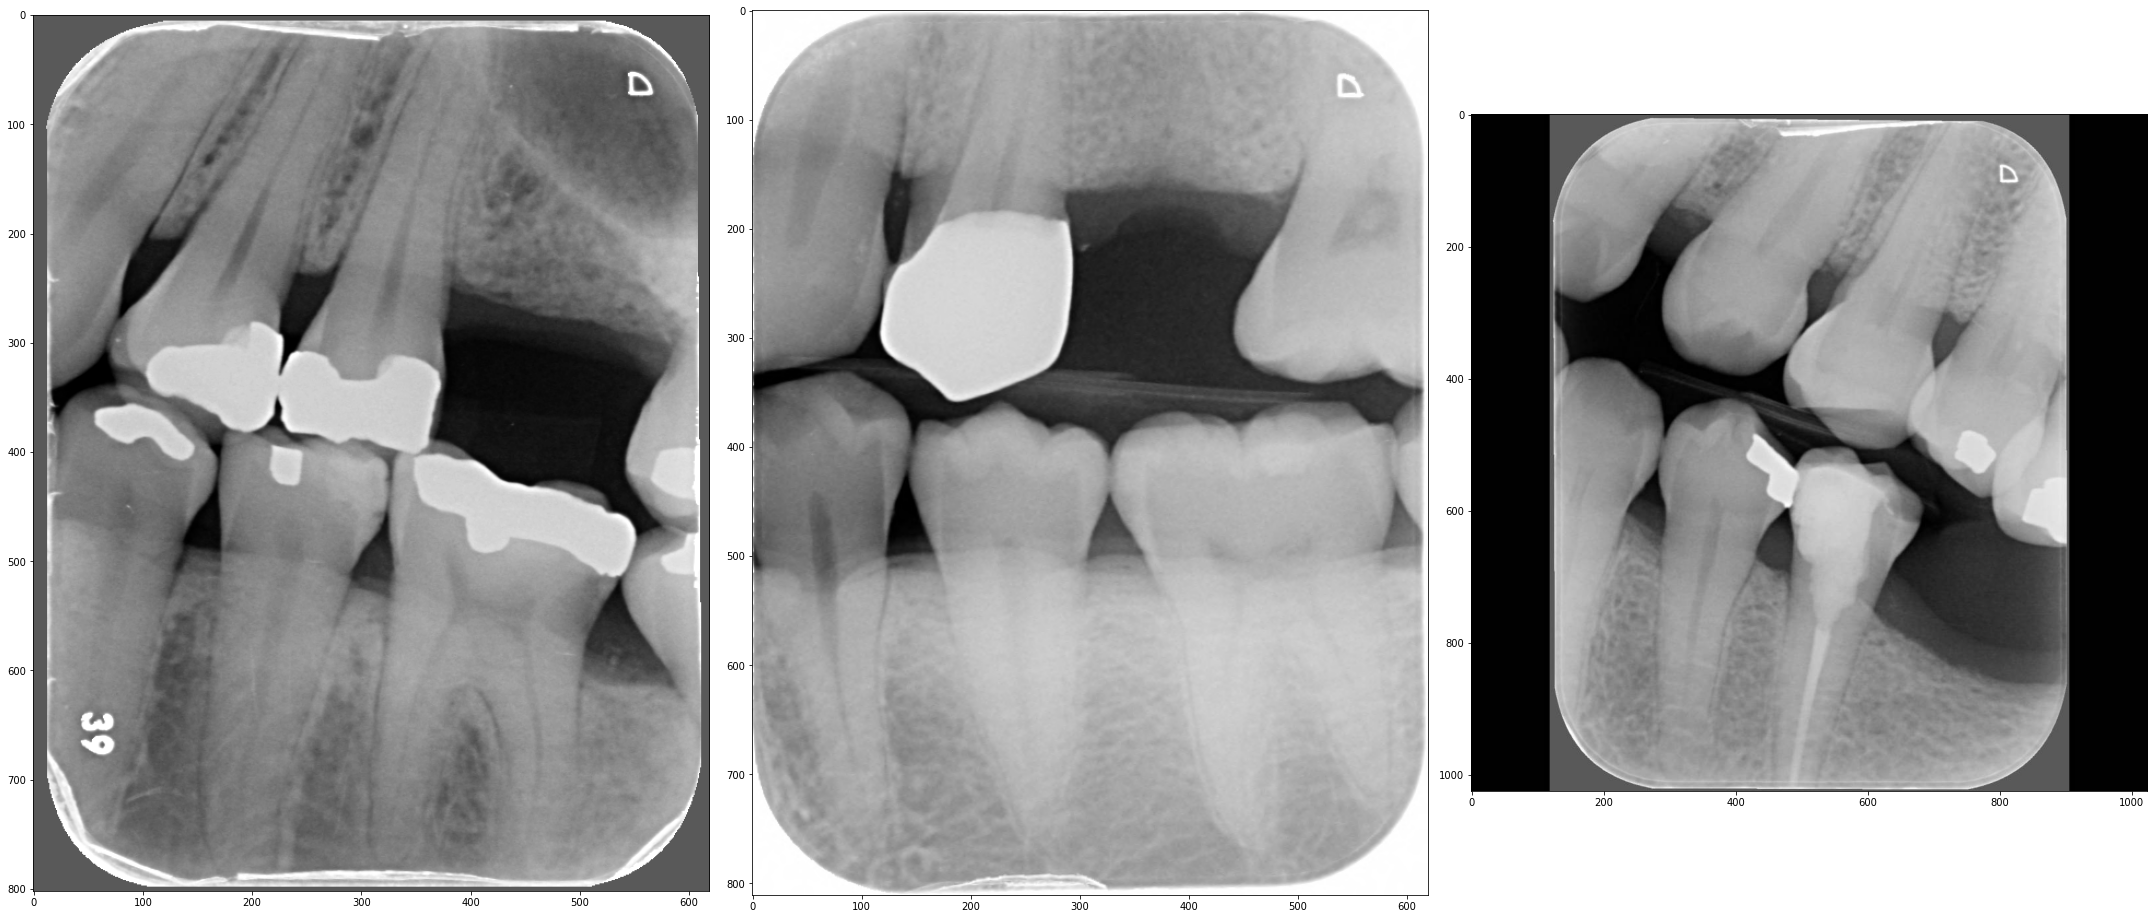

In [38]:
cpt = 0 
plt.figure(0, figsize=(50,50))
for file in os.listdir(test_data_dir+"/Normal"):
    if(file in miss_image):
#         plt.subplot(7)
        img = load_img(test_data_dir+"/Normal/"+ file)
#         predict_image(img)
        print(file)
        cpt = cpt + 1
        plt.subplot(3,5,cpt)
        plt.imshow(img)
        
plt.tight_layout()

plt.show()

ญาณี หญิง 65_1 7Feb2018.jpg
ญาณี หญิง 65_3 7Feb2018.jpg
ฐตรัตน์ หญิง 57_1.jpg
ฐตรัตน์ หญิง 57_4.jpg
ฐตรัตน์ หญิง 57_6.jpg
ณภรภัฐ หญิง 49_1.jpg
ณภรภัฐ หญิง 49_3.jpg
ณภรภัฐ หญิง 49_4.jpg
ทวีป  ชาย 52_5.jpg
ทวีศักดิ์  ว ชาย 57_4.jpg
ทศวร ชาย 31_1.jpg
ทศวร ชาย 31_3.jpg
ทศวร ชาย 31_4.jpg
ทิพยา  หญิง73_1.jpg
ธวัชชัย ช ชาย 39_1.jpg
ธวัชชัย ช ชาย 39_5.jpg
ธวัชชัย ช ชาย 39_6.jpg
ธัญลักษณ์ หญิง 37_1.jpg
ธัญลักษณ์ หญิง 37_2.jpg
ธีรตา หญิง44_1.jpg
ธีรตา หญิง44_4.jpg


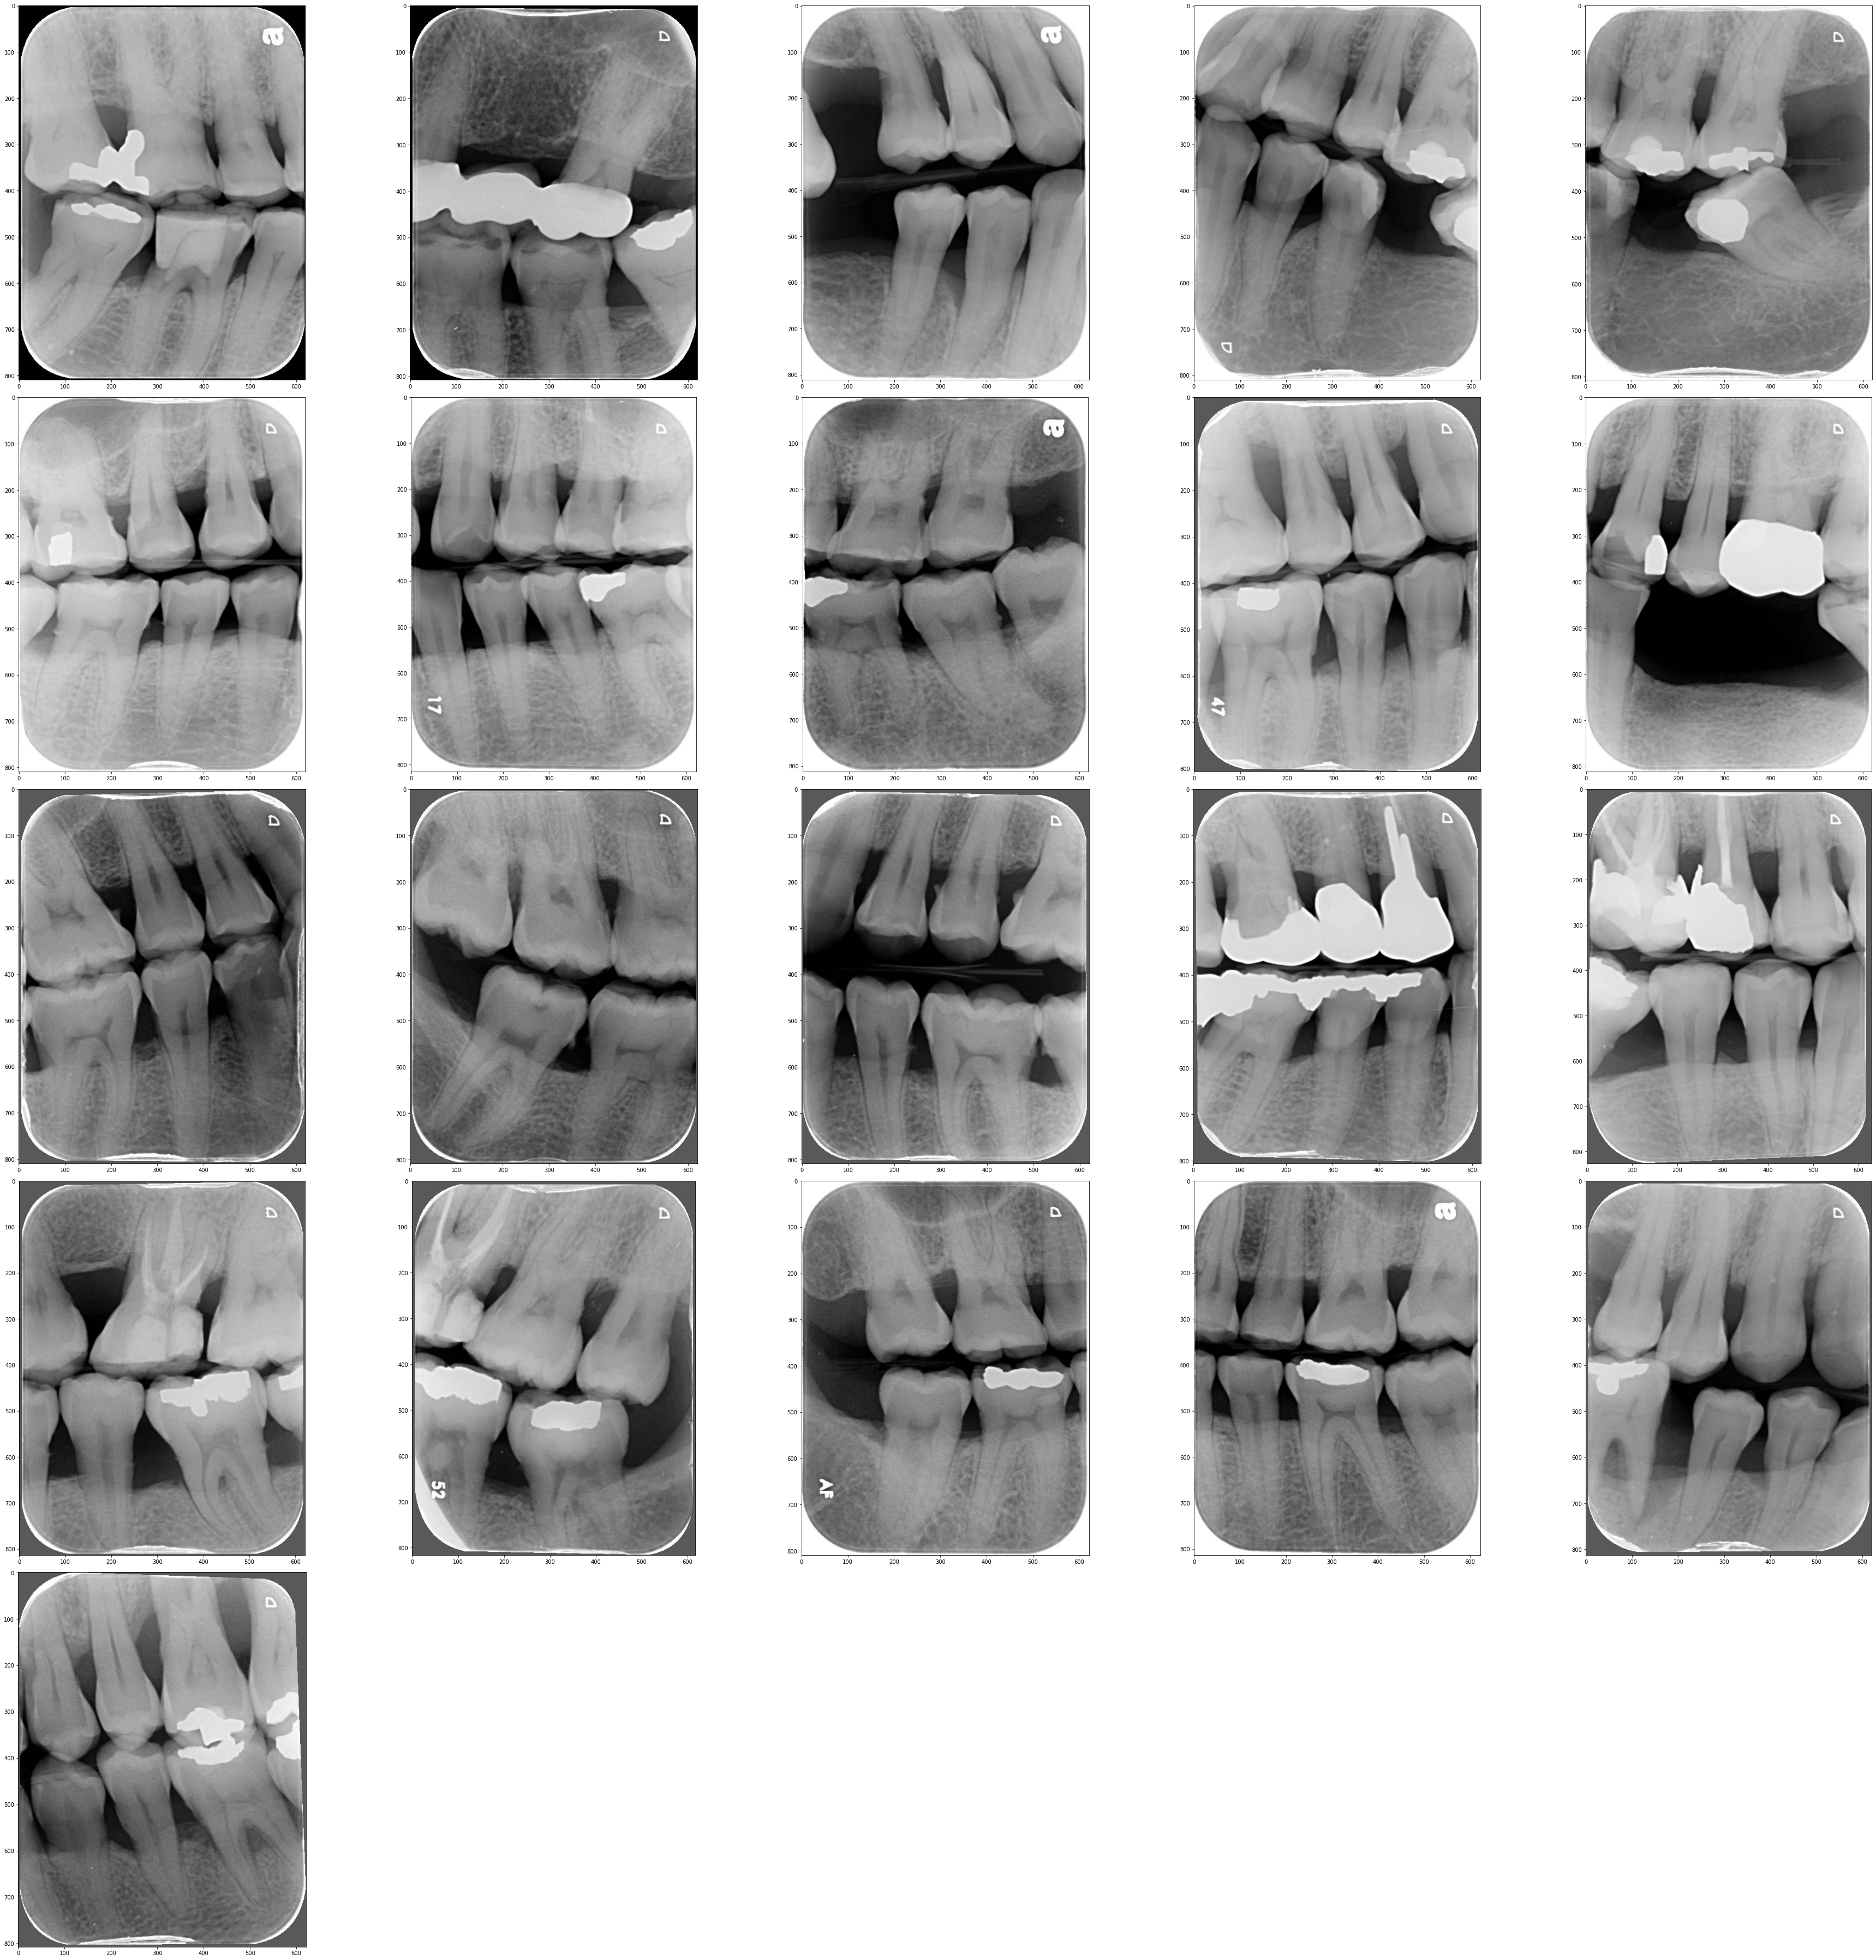

In [39]:

plt.figure(0, figsize=(50,50))
cpt = 0 

for file in os.listdir(test_data_dir+"/Diseases"):
    if(file in miss_image):
#         plt.subplot(7)
        print(file)
        img = load_img(test_data_dir+"/Diseases/"+ file)
        cpt = cpt + 1
        plt.subplot(5,5,cpt)
        plt.imshow(img)
        
plt.tight_layout()

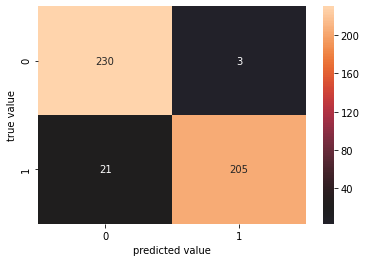

In [40]:
#Prediction of test set


conf_matrix = confusion_matrix(df.classes,df.predict)
sns.heatmap(conf_matrix,fmt='g',annot=True,center=20);
plt.xlabel('predicted value')
plt.ylabel('true value');



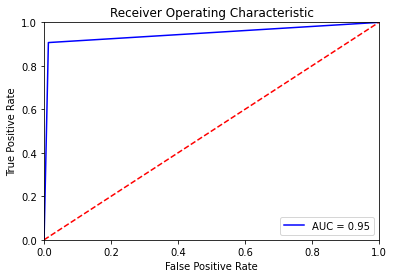

In [41]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
# probs = teeth.predict(test_generator)
# preds = test[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_generator.classes, test)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
# from ggplot import *
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')